In [48]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib
import copy
import pandas as pd
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [49]:
test_data = pd.read_csv('/Users/jdobrow/Desktop/Data Science/digit-recognizer/test.csv')
train_data = pd.read_csv('/Users/jdobrow/Desktop/Data Science/digit-recognizer/train.csv')

xtrain = train_data.drop(['label'], axis=1).values
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28)
ytrain = np.array(train_data['label'])

xtest = test_data.values
xtest = xtest.reshape(xtest.shape[0], 28, 28)

In [53]:
threshold = 80

for i in range(len(xtrain)):
    for j in range(28):
        for k in range(28):
            if xtrain[i][j][k] > threshold:
                xtrain[i][j][k] = 1
            else:
                xtrain[i][j][k] = 0
                
for i in range(len(xtest)):
    for j in range(28):
        for k in range(28):
            if xtest[i][j][k] > threshold:
                xtest[i][j][k] = 1
            else:
                xtest[i][j][k] = 0

In [50]:
# Finds and returns the next empty pixel in an image
def findNext(img):
    for i in range(28):
        for j in range(28):
            if img[i][j] == 0:
                return [[i,j]]
    return None

In [59]:
img_num = 11
animation_array = []
img = copy.deepcopy(xtrain[img_num])
img[0][0] = 1
active = [[0,0]]
new_active = []
go = 1
areas_count = 1
iteration = 0
swap_array = []
frame = 0
while go == 1:
    frame += 1
    animation_array.append(copy.deepcopy(img))
    plt.show()
    for coor in active:
        img[coor[0]][coor[1]] = 1
        try:
            if img[coor[0] + 1][coor[1]] == 0:
                new_active.append([coor[0] + 1, coor[1]])
                img[coor[0] + 1][coor[1]] = 1
        except:
            None
        try:
            if img[coor[0] - 1][coor[1]] == 0:
                new_active.append([coor[0] - 1, coor[1]])
                img[coor[0] - 1][coor[1]] = 1
        except:
            None
        try:
            if img[coor[0]][coor[1] + 1] == 0:
                new_active.append([coor[0], coor[1] + 1])
                img[coor[0]][coor[1] + 1] = 1
        except:
            None
        try:
            if img[coor[0]][coor[1] - 1] == 0:
                new_active.append([coor[0], coor[1] - 1])
                img[coor[0]][coor[1] - 1] = 1
        except:
            None
    if len(new_active) == 0:
        complete = 1
        for i in range(28):
            for j in range(28):
                complete *= img[i][j]
        if complete == 1:
            go = 0
        else:
            if iteration > 0:
                areas_count += 1
                swap_array.append(frame)
            active = (findNext(img))
            new_active = []
            iteration = 0
    else:
        active = new_active
        new_active = []
        iteration += 1

<IPython.core.display.Javascript object>


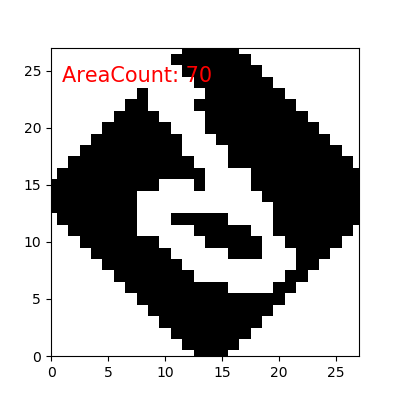

In [70]:
%matplotlib notebook
j = 1
fig = plt.figure()
ax = plt.axes(xlim=(0,27), ylim=(0,27))
l = ax.imshow(animation_array[0])
t = ax.text(1,24,'', color='red', fontsize=15)

def animate(i):
    global j
    l.set_data(animation_array[i])
    t.set_text('AreaCount: {}'.format(j))
    for n in range(len(swap_array)):
        if i < swap_array[n]:
            j = j + 1

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(animation_array), blit=True)
from IPython.display import HTML
HTML(ani.to_jshtml())
ani.save('/Users/jdobrow/Desktop/Data Science/Capstone 3 Files/animation.html', writer='html', fps=10)